In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime as dt

import os

In [34]:
def llaverage(x):
    if (x['Lon'].max() > 270.) and (x['Lon'].min() < 90.):
        xd = x.copy()
        xd['Lon'].where(xd['Lon'] < 180., xd['Lon']-360., inplace=True)
        result = xd.mean()
        if result['Lon'] < 0.: result['Lon'] = result['Lon']+360.
        return result
    else:
        return x.mean()
    return

In [29]:
pos_diri = r'C:\Users\apbarret\Documents\data\SnowOnSeaIce\SHEBA\Position'
pos_file = 'ship_spline_position_vel.txt'

def date_parse(x):
    return dt.datetime.strptime(x,'%y %m %d %H')

names = ['Year', 'Month', 'Day', 'Hour', 'decidays', 'Lon', 'Lat', 'u', 'v']
pos_df = pd.read_csv(os.path.join(pos_diri, pos_file), names=names, sep='\s+',
                     parse_dates={'time': ['Year', 'Month', 'Day', 'Hour']}, 
                     index_col='time')
pos_df.index = [date_parse(d) for d in pos_df.index]
pos_df['Lon'] = -1.*pos_df['Lon'] # Longitudes are degrees West

In [134]:
mpos_df = pos_df.resample('MS').agg(llaverage)

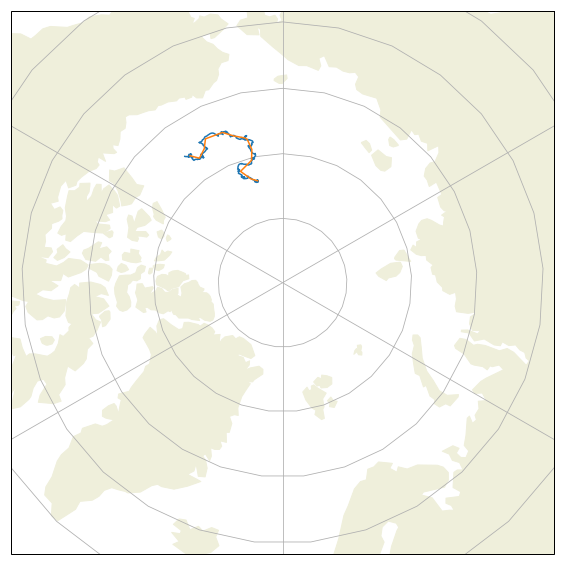

In [37]:
    map_proj = ccrs.NorthPolarStereo()

    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(projection=map_proj)
    ax.set_extent([-180.,180.,65.,90.], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.gridlines()

    traj0 = map_proj.transform_points(ccrs.PlateCarree(), pos_df['Lon'].values, pos_df['Lat'].values)
    traj1 = map_proj.transform_points(ccrs.PlateCarree(), mpos_df['Lon'].values, mpos_df['Lat'].values)

    ax.plot(traj0[:,0], traj0[:,1], '-', ms=2.5, label='Original')
    ax.plot(traj1[:,0], traj1[:,1], '-', ms=2.5, label='Monthly mean')


## Read SHEBA precipitation

In [81]:
ppt_diri = r'C:\Users\apbarret\Documents\data\SnowOnSeaIce\SHEBA\Precipitation'
ppt_file = 'nipher_data.corrected'

def parse_timestamp(xx):
    return [dt.datetime.strptime(str(x),'%y%m%d%H%M') for x in xx]

names = ['current_obs', 'previous_obs', 'time_firstevent', 'firstevent_type',
         'cp', 'time_lastevent', 'lastevent_type', 'u10m', 'T10m', 'Pmeasured', 'Pcorrected']
df = pd.read_csv(os.path.join(ppt_diri, ppt_file), names=names, sep='\s+')
df['current_obs'] = parse_timestamp(df['current_obs'])
df['previous_obs'] = parse_timestamp(df['previous_obs'])
df['time_firstevent'] = parse_timestamp(df['time_firstevent'])
df['time_lastevent'] = parse_timestamp(df['time_lastevent'])

df.index = [dt.datetime.strptime(d.strftime('%Y%m%d'),'%Y%m%d') for d in df['current_obs']]
df

,current_obs,previous_obs,time_firstevent,firstevent_type,cp,time_lastevent,lastevent_type,u10m,T10m,Pmeasured,Pcorrected
1997-10-29,1997-10-29 20:00:00,1997-10-28 20:00:00,1997-10-29 12:00:00,38,1,1997-10-29 12:00:00,38,13.0,-12.9,0.40,0.00
1997-10-30,1997-10-30 19:15:00,1997-10-29 20:00:00,1997-10-30 00:00:00,85,1,1997-10-30 12:00:00,85,14.3,-17.1,0.40,0.85
1997-10-31,1997-10-31 19:00:00,1997-10-30 19:15:00,1997-10-31 06:00:00,70,1,1997-10-31 06:00:00,70,7.0,-17.0,0.05,0.17
1997-11-01,1997-11-01 20:00:00,1997-10-31 19:00:00,1997-11-01 00:00:00,5,1,1997-11-01 00:00:00,5,7.0,-20.5,0.20,0.24
1997-11-03,1997-11-03 20:13:00,1997-11-02 20:30:00,1997-11-03 12:00:00,70,1,1997-11-03 12:00:00,70,5.0,-24.4,0.05,0.17
1997-11-04,1997-11-04 20:20:00,1997-11-03 20:13:00,1997-11-04 12:00:00,71,1,1997-11-04 18:00:00,70,1.5,-18.7,0.05,0.16
1997-11-05,1997-11-05 20:00:00,1997-11-04 20:20:00,1997-11-05 18:00:00,38,1,1997-11-05 18:00:00,38,20.0,-16.6,0.05,0.00
1997-11-06,1997-11-06 19:40:00,1997-11-05 20:00:00,1997-11-06 12:00:00,71,1,1997-11-06 18:00:00,71,15.5,-16.0,0.82,1.37
1997-11-08,1997-11-08 19:50:00,1997-11-07 20:15:00,1997-11-08 12:00:00,71,1,1997-11-08 00:00:00,73,7.5,-11.8,0.15,0.35
1997-11-11,1997-11-11 19:55:00,1997-11-10 19:44:00,1997-11-11 00:00:00,71,1,1997-11-11 18:00:00,71,15.0,-13.1,0.26,0.69


In [88]:
df['obs_period'] = df['current_obs'] - df['previous_obs']
df['obs_period'].max()

Timedelta('4 days 00:13:00')

In [145]:
import calendar
import numpy as np

def agg_ppto(x):
    print ('{:02d} {:d}'.format(x.index.month[0], x.size) )
    
moDf = df['Pcorrected'].resample('MS').sum().to_frame()

moDf['days'] = [calendar.monthrange(y,m)[1] for y, m in zip(moDf.index.year, moDf.index.month)]
moDf['Pmean'] = moDf['Pcorrected'] / moDf['days']
moDf['Tmean'] = df['T10m'].resample('MS').mean()
moDf['Umean'] = df['u10m'].resample('MS').mean()
moDf.loc['1997-10-01',:] = np.nan
moDf.loc['1998-10-01',:] = np.nan
moDf

,Pcorrected,days,Pmean,Tmean,Umean
1997-10-01,NaN,NaN,NaN,NaN,NaN
1997-11-01,13.84,30.0,0.461333,-18.173684,10.563158
1997-12-01,10.42,31.0,0.336129,-28.166667,13.044444
1998-01-01,20.54,31.0,0.662581,-23.170000,11.770000
1998-02-01,5.41,28.0,0.193214,-24.128571,9.128571
1998-03-01,13.61,31.0,0.439032,-20.415789,9.857895
1998-04-01,14.70,30.0,0.490000,-16.160000,9.200000
1998-05-01,9.90,31.0,0.319355,-9.985714,8.850000
1998-06-01,13.41,30.0,0.447000,-0.933333,9.222222
1998-07-01,35.17,31.0,1.134516,-0.609091,9.963636


In [135]:
mpos_df

,decidays,Lon,Lat,u,v
1997-10-01,288.979167,-143.889107,75.406523,-1.954305,2.389350
1997-11-01,318.979167,-146.237366,76.088671,-3.594733,1.786369
1997-12-01,349.479167,-149.664040,75.590619,-2.509832,-3.849589
1998-01-01,380.479167,-151.799494,74.848145,-7.088679,-0.855763
1998-02-01,409.979167,-158.178808,74.974938,-3.693109,0.491952
1998-03-01,439.479167,-161.466655,75.616840,-4.765891,3.855237
1998-04-01,469.979167,-165.251153,76.087511,-1.906940,-0.524390
1998-05-01,500.479167,-166.131591,76.271072,-1.320854,3.367610
1998-06-01,530.979167,-166.996181,77.276229,0.007646,5.471510
1998-07-01,561.479167,-165.796649,78.251681,4.845049,1.509874


In [150]:
mpos_df.join(moDf).dropna(subset=['Pcorrected'], axis=0).to_csv(os.path.join(ppt_diri,'nipher_data.corrected.month.csv'))

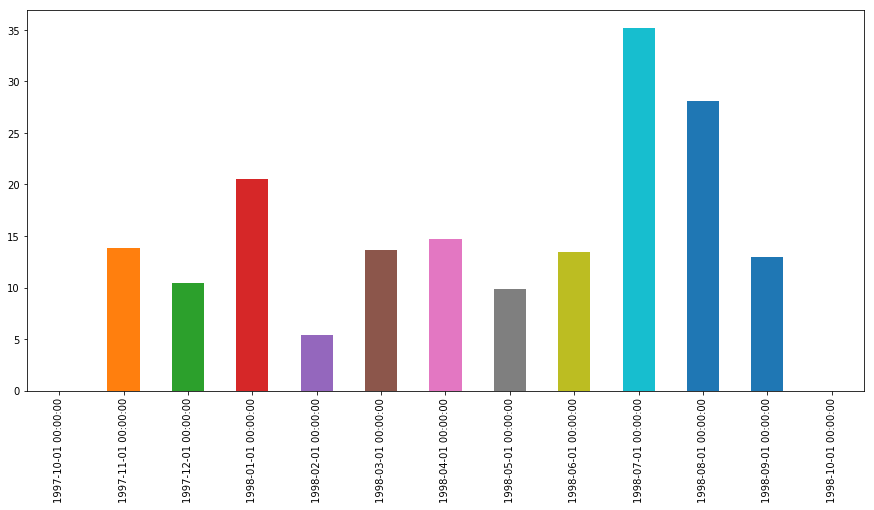

In [132]:
fig, ax = plt.subplots(figsize=(15,7))
moDf['Pcorrected'].plot.bar(ax=ax)